In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from google.colab import drive
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/FakeNewsNet/FakeNewsNet.csv')

In [11]:
# Remove rows where 'title' is NaN
df = df.dropna(subset=['title'])

In [12]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


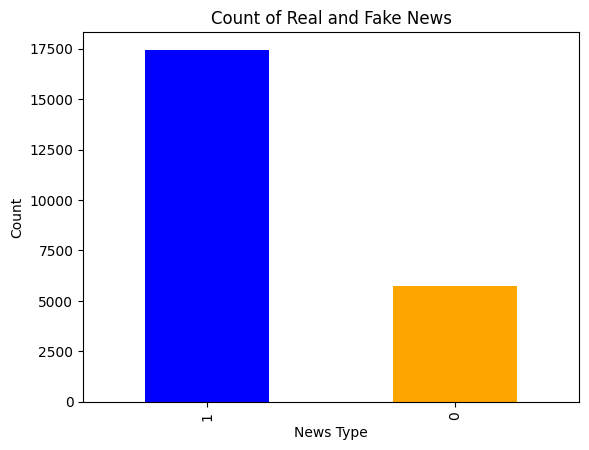

In [13]:
# Show the count of real and fake news
df['real'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Count of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


In [14]:
# Initialize necessary tools
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Customize stop words by excluding certain words while keeping important ones
important_words_to_keep = {"not", "no", "never", "can", "could", "will", "would", "shall", "should", "may", "might", "must",
                           "but", "and", "or", "yet", "so",
                           "I", "you", "he", "she", "it", "we", "they",
                           "a", "an", "the", "this", "that", "these", "those",
                           "in", "on", "at", "by", "for", "with", "of", "to",
                           "wow", "oh", "hey", "hmm"}

custom_stop_words = stop_words - important_words_to_keep


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
def preprocess_text(text):
    # Lower case
    text = text.lower()

    # Combine link removal and ".com" removal
    text = re.sub(r'http\S+|www\S+|https\S+|\s[A-Za-z]*\.com', '', text, flags=re.MULTILINE)

    # Combine newline and extra space replacements
    text = re.sub(r"(\\n|\n|\t|\s\s+)", ' ', text).strip()

    # Add spaces around punctuation
    text = text.replace('?', ' ? ').replace(')', ') ')

    # Define allowed special characters
    allowed_chars = "£$"

    # Remove unwanted characters but keep allowed ones and apostrophes
    text = re.sub(r"[^a-zA-Z0-9\s" + re.escape(allowed_chars) + "]", '', text)

    # Tokenize preserving apostrophes and allowed characters
    tokens = word_tokenize(text)

    # Remove stop words and single characters
    tokens = [token for token in tokens if token not in custom_stop_words and len(token) > 1]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) if lemmatizer.lemmatize(token) else token for token in tokens]

    return ' '.join(tokens)


In [16]:
# Apply preprocessing to the 'title' column
df['title'] = df['title'].apply(preprocess_text)

In [17]:
# Remove rows with empty strings in 'title' column
df = df[df['title'].str.strip() != '']

In [18]:
# Save the preprocessed dataset
df.to_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv', index=False)

In [19]:
# Load and display the preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')
print(df['title'][0])

kandi burruss explodes rape accusation on real housewife of atlanta reunion video


In [20]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes rape accusation on real...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people choice award 2018 the best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to on...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour of inappr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl 10 year later upper east siders sh...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
